<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Financial_Services_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [8]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Financial_Services.csv")

In [9]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                44936 non-null  object 
 1   Symbol              44936 non-null  object 
 2   Series              44936 non-null  object 
 3   Prev Close          44936 non-null  float64
 4   Open                44936 non-null  float64
 5   High                44936 non-null  float64
 6   Low                 44936 non-null  float64
 7   Last                44936 non-null  float64
 8   Close               44936 non-null  float64
 9   VWAP                44936 non-null  float64
 10  Volume              44936 non-null  int64  
 11  Turnover            44936 non-null  float64
 12  Trades              22104 non-null  float64
 13  Deliverable Volume  41548 non-null  float64
 14  %Deliverble         41548 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 5.1

In [10]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  44936.000000  44936.000000  44936.000000  44936.000000  44936.000000   
mean    1011.887749   1012.962467   1028.640355    996.257818   1012.345205   
std     1267.314789   1268.692039   1286.707053   1249.817015   1268.357414   
min        9.150000      8.500000      9.750000      8.500000      9.100000   
25%      283.487500    284.137500    288.700000    278.837500    283.500000   
50%      648.250000    648.925000    659.750000    637.000000    648.000000   
75%     1262.500000   1262.000000   1280.450000   1243.612500   1262.962500   
max    11393.300000  11300.000000  11770.000000  11294.000000  11386.700000   

              Close          VWAP        Volume      Turnover        Trades  \
count  44936.000000  44936.000000  4.493600e+04  4.493600e+04  2.210400e+04   
mean    1012.369171   1012.666007  3.648727e+06  2.451209e+14  8.891466e+04   
std     1268.333111   1268.566674  9.009996e+06  4.

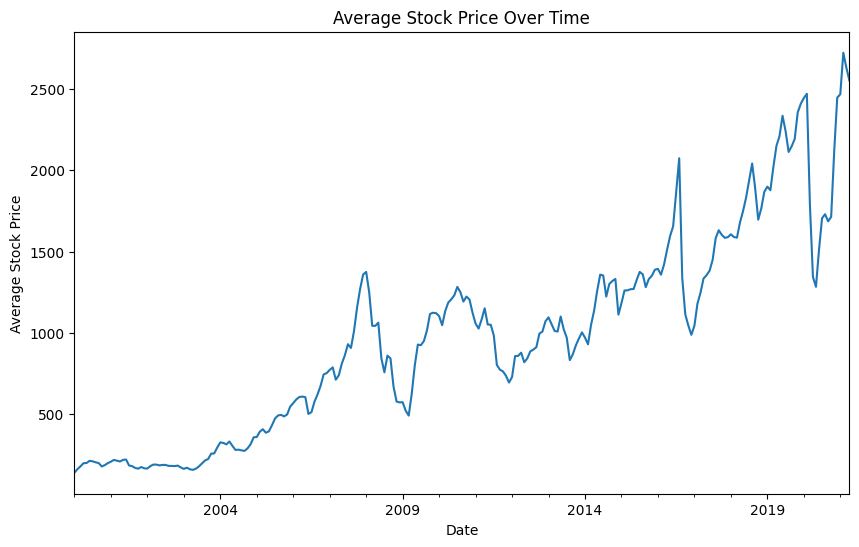

In [11]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

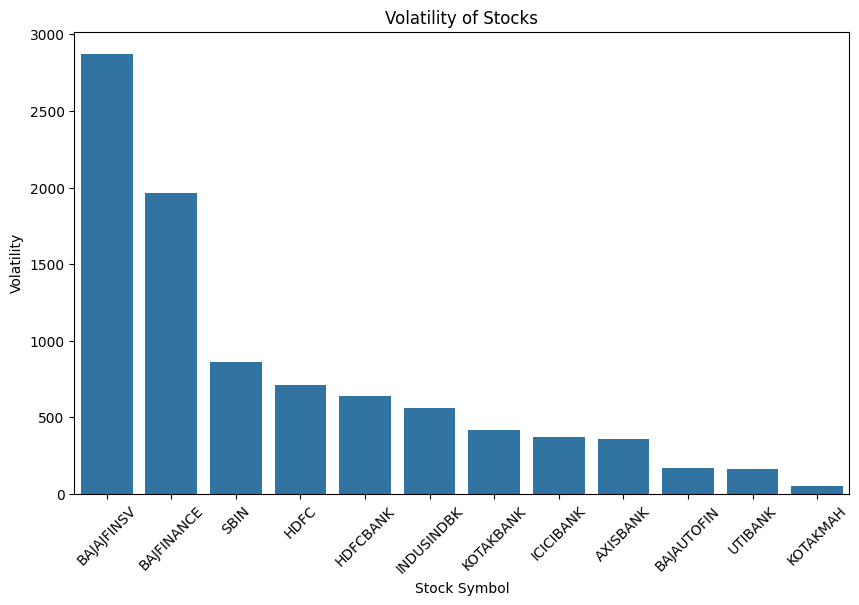

In [12]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

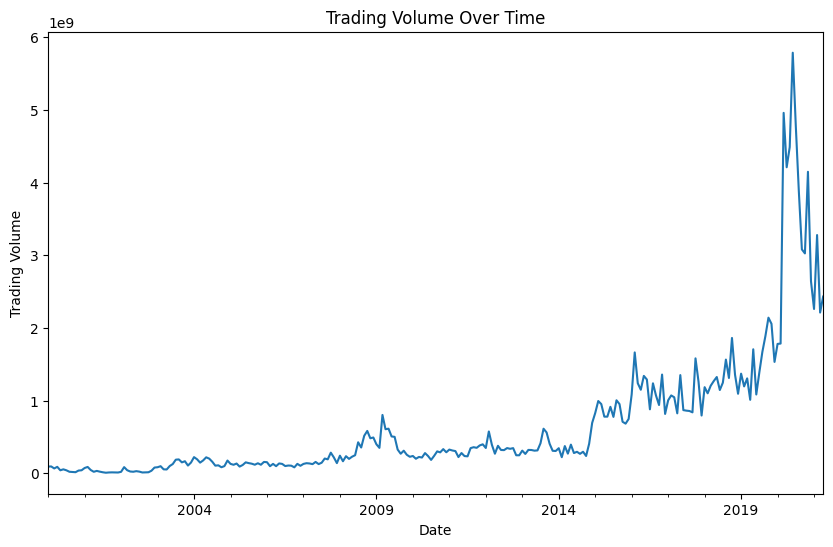

In [13]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


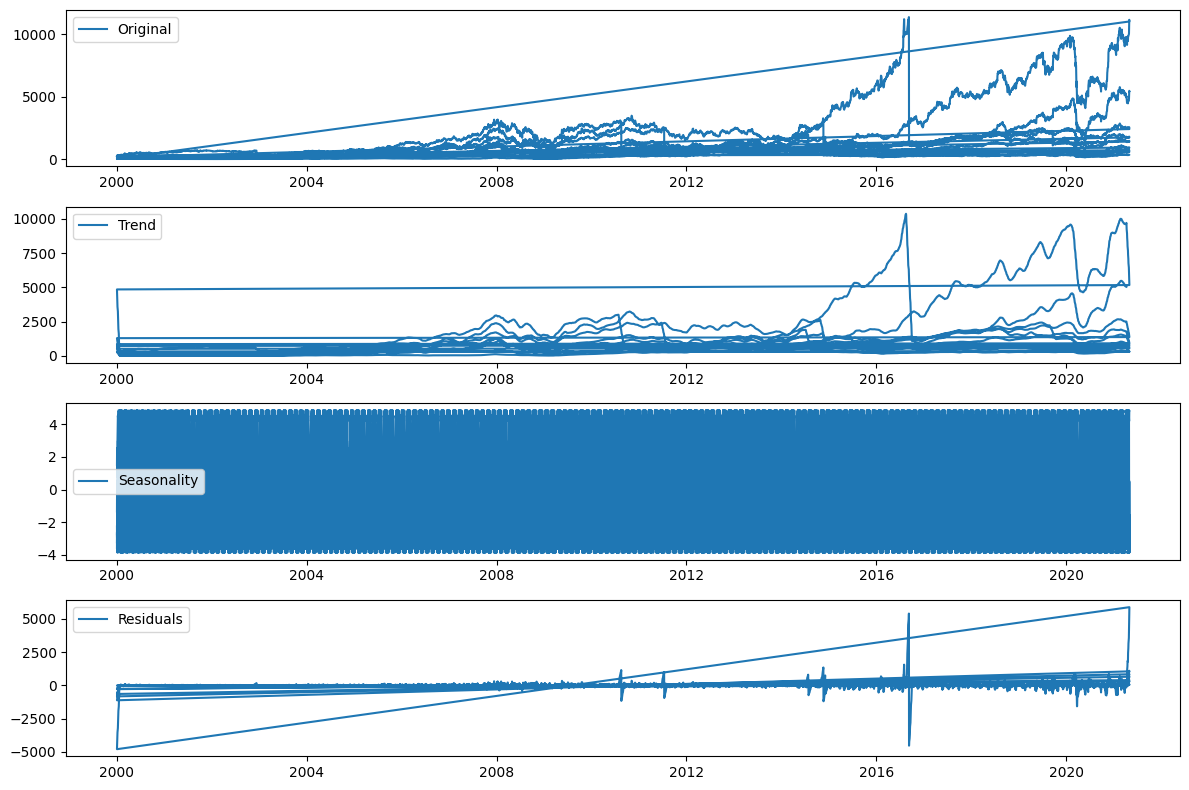

In [14]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

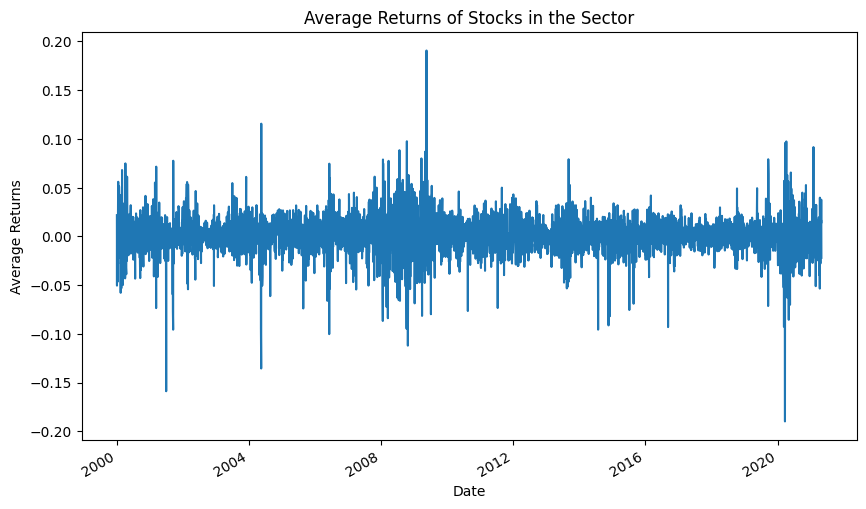

In [15]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()